In [40]:
import tensorflow as tf
import keras
import os 
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline



The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.<br>

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

<i>source : https://www.cs.toronto.edu/~kriz/cifar.html </i>

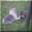

In [41]:
def get_three_classes(x,y):
  indices_0 ,_ = np.where(y == 0)
  indices_1 ,_ = np.where(y == 1)
  indices_2 ,_ = np.where(y == 2)

  indices = np.concatenate ([indices_0,indices_1  , indices_2], axis = 0)

  x= x[indices]
  y = y[indices]


  count = x.shape[0]

  #shuffling indices
  indices = np.random.shuffle(list(range(count)))

  x = x[indices]
  y = y[indices]
  x = x.reshape((x.shape[1:]))
  y = y.reshape((y.shape[1:]))
  #
  y = keras.utils.to_categorical(y)

  return x,y


Due to coputational limilattion we will be only using three classes

In [42]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train , y_train = get_three_classes(x_train, y_train)
x_test , y_test = get_three_classes(x_test, y_test)
print("shape of x test  ", x_train.shape," shape of y train ",y_train.shape)
print("shape of x test  ", x_test.shape," shape of y test ",y_test.shape )


shape of x test   (15000, 32, 32, 3)  shape of y train  (15000, 3)
shape of x test   (3000, 32, 32, 3)  shape of y test  (3000, 3)


##Visualization

In [43]:
class_names = ['airplane', 'automobile', 'bird']

In [50]:
def show_random_samples(x, y , pred):
  indices= np.random.choice(range(x.shape[0]),10, replace= False )


  x = x[indices]
  y = y[indices]
  pred = pred[indices]

  plt.figure(figsize = (10,5))
  for i in range(10):
    plt.subplot(2,5, i+1)

    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col = 'green' if np.argmax(y[i]) == np.argmax(pred[i]) else 'red'
    plt.xlabel(class_names[np.argmax(pred[i])] , color = col)

  plt.show()




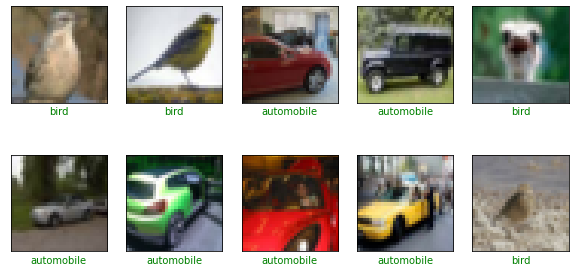

In [6]:
show_random_samples(x_train,y_train,y_train)

Green label indicates that the image is correctly labeled. In our above example we have used y_train as predictions . Hence we are getting 10/10 accuracy

##Building the model

In [45]:
from keras.layers import Conv2D , MaxPooling2D , BatchNormalization
from keras.layers import Dropout , Flatten , Input , Dense

In [13]:
#Model

def add_conv_block(model , num_filters):
  model.add(Conv2D(num_filters , 3 , activation= 'relu', padding = 'same' ))
  model.add(BatchNormalization())
  model.add(Conv2D(num_filters , 3 , activation= 'relu', padding = 'same' ))
  model.add(MaxPooling2D(pool_size = 2))
  model.add(Dropout(0.3))

  return model


model = keras.models.Sequential()
model.add(Input( shape = (32 , 32 , 3)))

model = add_conv_block(model , 32)
model = add_conv_block(model , 64)
model = add_conv_block(model , 128)

model.add(Flatten())

model.add(Dense(3 , activation= 'softmax'))



In [14]:
model.compile( loss ='categorical_crossentropy' ,
              optimizer ='adam', metrics = ['accuracy'] 
                )

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 64)       

#Training the model

In [15]:
history = model.fit(
    x = x_train/255. , y = y_train,
    validation_data = (x_test/255. , y_test),
    epochs = 20, batch_size = 128,
    callbacks =[
                keras.callbacks.EarlyStopping(monitor = 'val_accuracy' , patience = 3),
                keras.callbacks.ModelCheckpoint(
                    'model_{val_accuracy:.3f}.h5',
                     save_best_only = True, save_weights_only = False,
                     monitor = 'val_accuracy')
    ] 
)


Epoch 1/20
118/118 [==============================] - 4s 33ms/step - loss: 0.7362 - accuracy: 0.7307 - val_loss: 2.3395 - val_accuracy: 0.4070
Epoch 2/20
118/118 [==============================] - 4s 30ms/step - loss: 0.4727 - accuracy: 0.8151 - val_loss: 2.0608 - val_accuracy: 0.4933
Epoch 3/20
118/118 [==============================] - 3s 30ms/step - loss: 0.3816 - accuracy: 0.8508 - val_loss: 2.5985 - val_accuracy: 0.4057
Epoch 4/20
118/118 [==============================] - 4s 31ms/step - loss: 0.3370 - accuracy: 0.8706 - val_loss: 0.5386 - val_accuracy: 0.7930
Epoch 5/20
118/118 [==============================] - 4s 30ms/step - loss: 0.2900 - accuracy: 0.8868 - val_loss: 0.4564 - val_accuracy: 0.8290
Epoch 6/20
118/118 [==============================] - 4s 30ms/step - loss: 0.2675 - accuracy: 0.8965 - val_loss: 0.2723 - val_accuracy: 0.9033
Epoch 7/20
118/118 [==============================] - 4s 30ms/step - loss: 0.2468 - accuracy: 0.9061 - val_loss: 0.5415 - val_accuracy: 0.8057

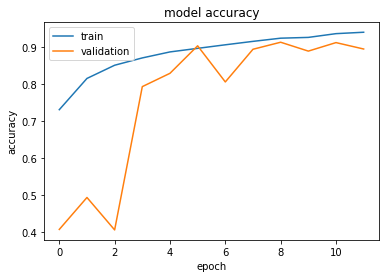

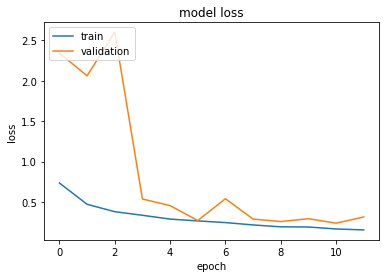

In [17]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##making predictions

In [46]:
#loading the model
model = keras.models.load_model('/content/model_0.913.h5')


In [48]:
predictions = model.predict(x_test/255.)


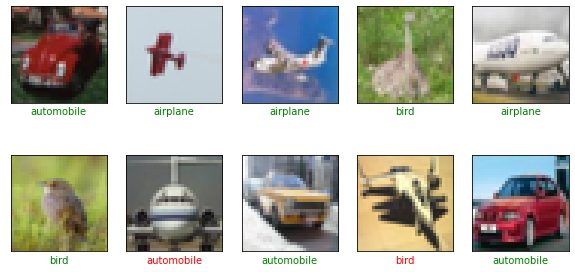

In [52]:
show_random_samples(x_test , y_test , predictions)